# Dimensionality Reduction

## PCA

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


TimeoutError: Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\2061693\.matplotlib\fontlist-v330.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.

In [149]:
df = pd.read_csv('Crop_recommendation.csv')

In [150]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [151]:
X = df.drop('label',axis=1).values
y = df['label'].values

In [152]:
print(X[0])

[ 90.          42.          43.          20.87974371  82.00274423
   6.50298529 202.9355362 ]


In [153]:
X = StandardScaler().fit_transform(X)
#X = MinMaxScaler().fit_transform(X)
print(X[0])

[ 1.0687974  -0.34455075 -0.1016875  -0.93558693  0.47266646  0.04330173
  1.8103605 ]


In [154]:
for i in range(8):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X)
    print('Explained Variance Ratio = ',sum(pca.explained_variance_ratio_),' for n = ',i)

Explained Variance Ratio =  0  for n =  0
Explained Variance Ratio =  0.27588831430207356  for n =  1
Explained Variance Ratio =  0.4607326252557198  for n =  2
Explained Variance Ratio =  0.6145196628084114  for n =  3
Explained Variance Ratio =  0.7606469712075241  for n =  4
Explained Variance Ratio =  0.8757795965122815  for n =  5
Explained Variance Ratio =  0.9724312590028591  for n =  6
Explained Variance Ratio =  0.9999999999999998  for n =  7


In [157]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2', 'principal component 3',
                         'principal component 4', 'principal component 5', 'principal component 6'
                        ])
finalDf = pd.concat([principalDf, df.label],axis=1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,label
0,-0.582869,-0.844586,1.373343,-1.614129,0.308224,-0.095997,rice
1,-0.474635,-0.784895,1.252178,-1.792762,1.107745,-0.532255,rice
2,-0.634068,-0.694522,1.179332,-1.818106,2.523263,-0.538551,rice
3,-1.047920,-1.087658,1.393351,-0.982401,1.448781,-0.656929,rice
4,-0.873258,-0.658673,1.455685,-2.335012,1.959633,-0.318025,rice


Explained Variance Ratio =  0.9724312590028591


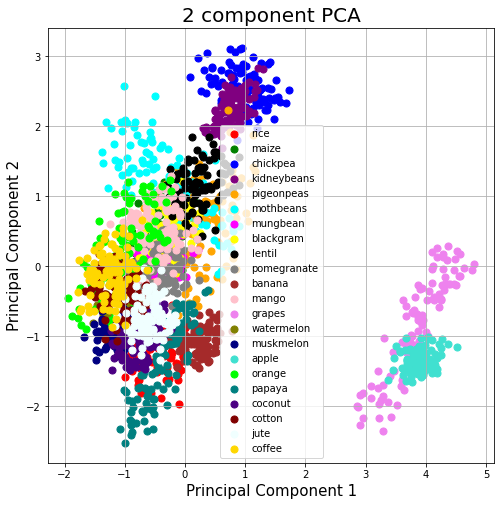

In [156]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df['label'].unique()
colors = ['red', 'green', 'blue', 'purple', 'orange',
          'cyan', 'magenta', 'yellow','black',
          'gray', 'brown', 'pink', 'violet', 'olive',
          'navy', 'turquoise', 'lime', 'teal',
          'indigo', 'maroon', 'azure', 'gold']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#By using the attribute explained_variance_ratio_, you can see that the first principal component 
#contains 72.77% of the variance and the second principal component contains 23.03% of the variance. 
#Together, the two components contain 95.80% of the information.

print('Explained Variance Ratio = ',sum(pca.explained_variance_ratio_))

In [161]:
df_pca = finalDf
df_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,label
0,-0.582869,-0.844586,1.373343,-1.614129,0.308224,-0.095997,rice
1,-0.474635,-0.784895,1.252178,-1.792762,1.107745,-0.532255,rice
2,-0.634068,-0.694522,1.179332,-1.818106,2.523263,-0.538551,rice
3,-1.047920,-1.087658,1.393351,-0.982401,1.448781,-0.656929,rice
4,-0.873258,-0.658673,1.455685,-2.335012,1.959633,-0.318025,rice


## K-means clustering

In [162]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [163]:
df = pd.read_csv('Crop_recommendation.csv')

In [164]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
X = df.drop('label',axis=1).values
y = df['label'].values

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 9, init = 'k-means++', random_state = 42)
kmeans.fit(X_train,y_train)
y_kmeans = kmeans.fit_predict(X_train)
knn.score(X_test,y_test)

In [ ]:
plt.figure(1 , figsize = (17 , 8))

plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'aqua', label = 'Cluster 3')
plt.scatter(X_train[y_kmeans == 3, 0], X_train[y_kmeans == 3, 1], s = 100, c = 'violet', label = 'Cluster 4')
plt.scatter(X_train[y_kmeans == 4, 0], X_train[y_kmeans == 4, 1], s = 100, c = 'lightgreen', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'navy', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## K-NN Classification

In [165]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [191]:
df = pd.read_csv('Crop_recommendation.csv')

In [192]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [193]:
train_accuracy =[]
test_accuracy =[]

In [194]:
for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    y_pred= knn.predict(X_test)
    ac=accuracy_score(y_pred,y_test)
    test_accuracy.append(ac)

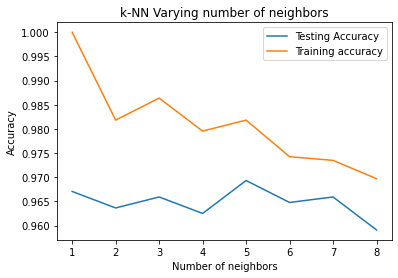

In [195]:
neighbors = np.arange(1,9)

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [196]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9693181818181819

In [197]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        40
      banana       1.00      1.00      1.00        40
   blackgram       0.78      1.00      0.88        40
    chickpea       1.00      1.00      1.00        40
     coconut       0.98      1.00      0.99        40
      coffee       1.00      1.00      1.00        40
      cotton       0.95      1.00      0.98        40
      grapes       1.00      1.00      1.00        40
        jute       0.83      1.00      0.91        40
 kidneybeans       0.93      1.00      0.96        40
      lentil       0.94      0.85      0.89        40
       maize       1.00      0.95      0.97        40
       mango       0.98      1.00      0.99        40
   mothbeans       0.97      0.90      0.94        40
    mungbean       0.98      1.00      0.99        40
   muskmelon       1.00      1.00      1.00        40
      orange       1.00      0.85      0.92        40
      papaya       1.00    

In [198]:
knn.score(X_test,y_test)

0.9693181818181819

## Decision Trees classification

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [ ]:
y = pd.get_dummies(y)

In [ ]:
print(y.info())

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

parameters = {'criterion':('gini', 'entropy'),
              'min_samples_split':[2,3,4,5],
              'max_depth':[9,10,11,12] # try with 3,4
              }

tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
print(model.criterion)
print(model.min_samples_split)
print(model.max_depth)

In [ ]:
y_pred=model.predict(X_test)
score = model.score(X_test, y_test)
print(score)

## Naive-Bayes Classification

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [ ]:
X = df.drop('label',axis=1).values
y = df['label'].values

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,
                                                random_state=123, stratify=y)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print (cm)


In [ ]:
print('f1 score:',f1_score(y_test, y_pred,average='micro'))
print('accuracy:',accuracy_score(y_test, y_pred))

## SVM

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
df

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sb.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
sb.barplot(x='temperature', y='rainfall',data=df)

In [ ]:
X = df.drop(['label'], axis = 1)
y = df['label']

In [ ]:
print(y[30:40])

# Encoding our dependent variable:Quality column
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

print(y[:100])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 0)

In [ ]:
print(X_train[0:2])
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train[0:2])

In [ ]:
classifier = SVC(kernel = 'rbf', random_state = 0, gamma=0.9)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix is:")
print(cm)

In [ ]:
from sklearn import metrics
# Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

## Random Forest

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df

In [ ]:
X = df.drop('label',axis=1).values
y = df['label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

## Logistic Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [ ]:
X = df.drop(['label'], axis = 1)
y = df['label']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))